In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.decomposition import PCA, FactorAnalysis


In [ ]:
# Load the data
train_df = pd.read_csv('/content/Placement_Train .csv')
test_df = pd.read_csv('/content/Placement_Test.csv')

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SR_no           84 non-null     int64  
 1   gender          84 non-null     object 
 2   ssc_p           84 non-null     float64
 3   ssc_b           84 non-null     object 
 4   hsc_p           84 non-null     float64
 5   hsc_b           84 non-null     object 
 6   hsc_s           84 non-null     object 
 7   degree_p        84 non-null     float64
 8   degree_t        84 non-null     object 
 9   workex          84 non-null     object 
 10  etest_p         84 non-null     float64
 11  GD_Percent      84 non-null     float64
 12  Avg_GPA_Comm    84 non-null     float64
 13  Avg_GPA_CT      84 non-null     float64
 14  Avg_GPA_mang    84 non-null     float64
 15  specialisation  84 non-null     object 
 16  mba_CGPA        84 non-null     float64
 17  Annual_salary   84 non-null     int64

            SR_no      ssc_p      hsc_p    degree_p     etest_p  GD_Percent  \
count   84.000000  84.000000  84.000000   84.000000   84.000000   84.000000   
mean    56.250000  73.624167  71.568452   78.080357   85.708333   78.523810   
std     32.180917   8.297665   8.953030    9.309518    7.756151    6.483484   
min      2.000000  49.000000  52.830000   56.830000   64.500000   64.500000   
25%     26.750000  67.000000  65.000000   70.875000   80.875000   72.875000   
50%     57.000000  74.550000  70.200000   77.350000   86.500000   78.500000   
75%     83.250000  80.000000  77.490000   85.820000   91.125000   82.500000   
max    110.000000  87.800000  99.000000  100.000000  100.000000   92.500000   

       Avg_GPA_Comm  Avg_GPA_CT  Avg_GPA_mang   mba_CGPA  Annual_salary  
count     84.000000   84.000000     84.000000  84.000000   8.400000e+01  
mean       3.005952    3.205952      3.148810   3.231429   1.803333e+06  
std        0.254762    0.297925      0.277898   0.148285   3.59525

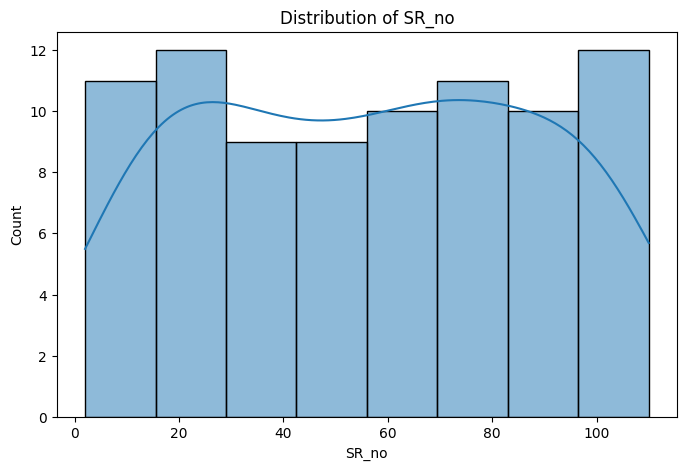

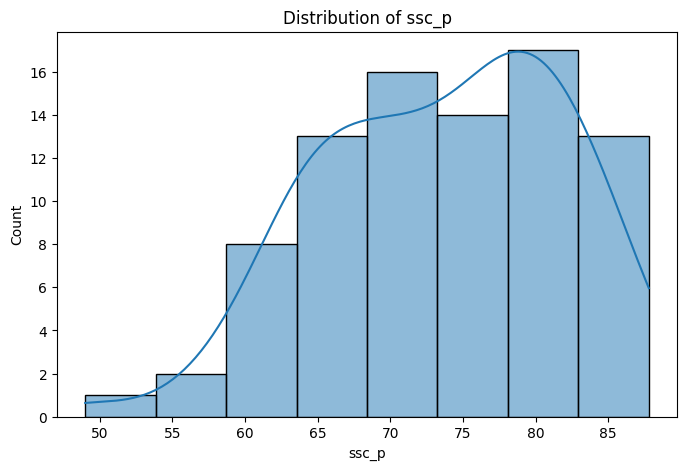

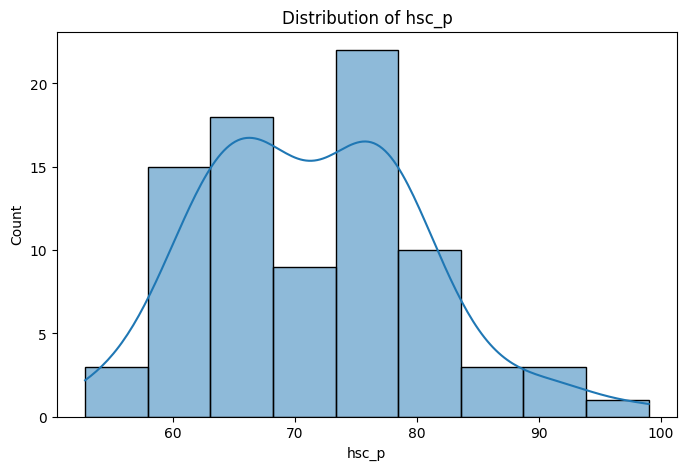

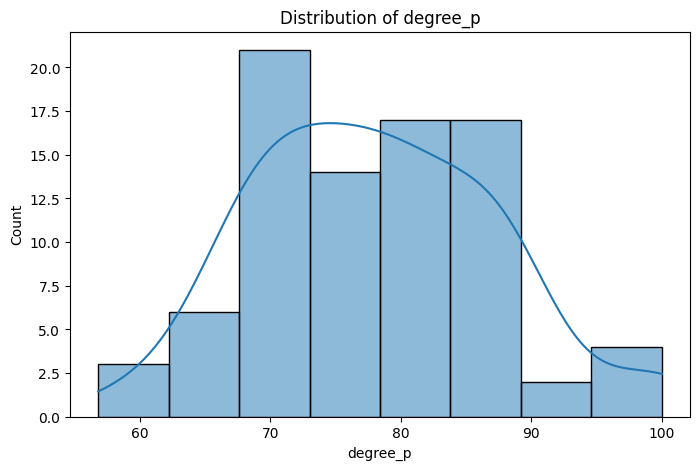

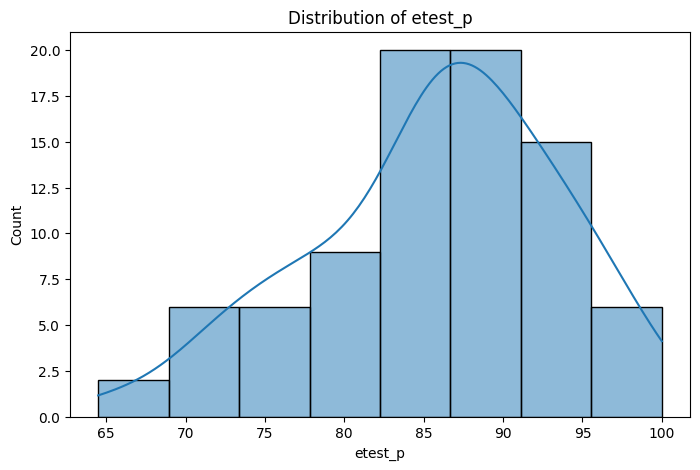

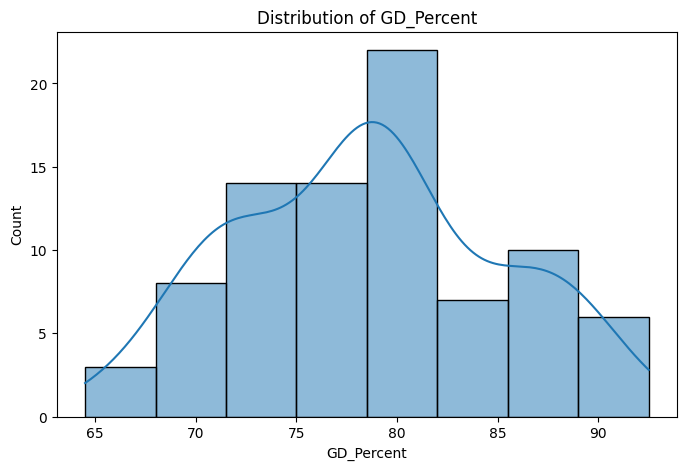

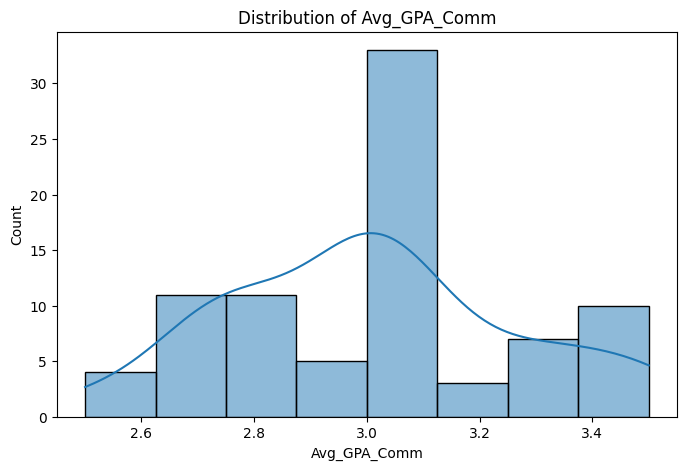

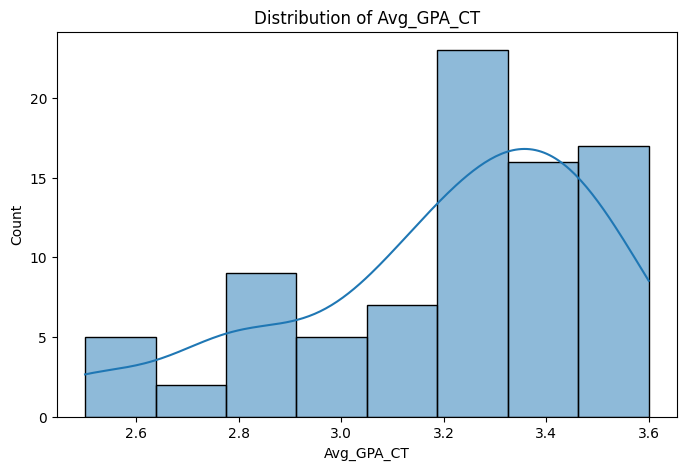

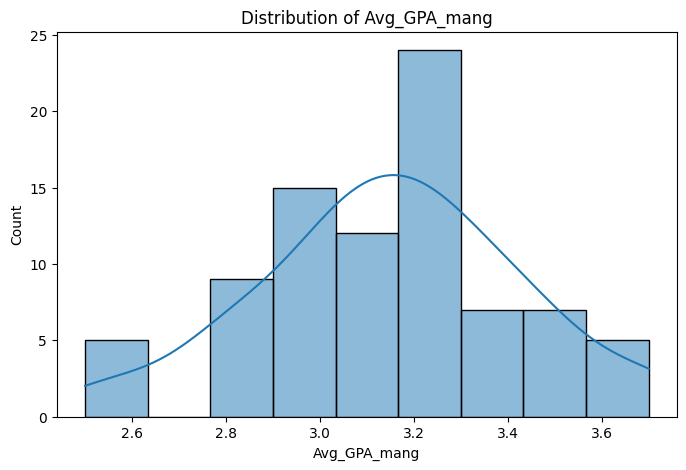

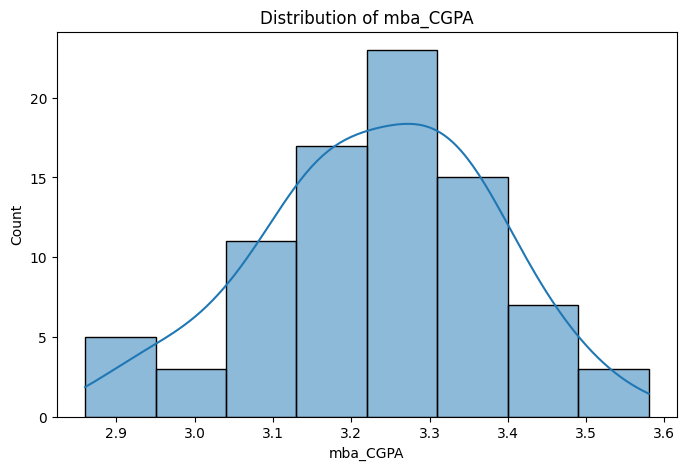

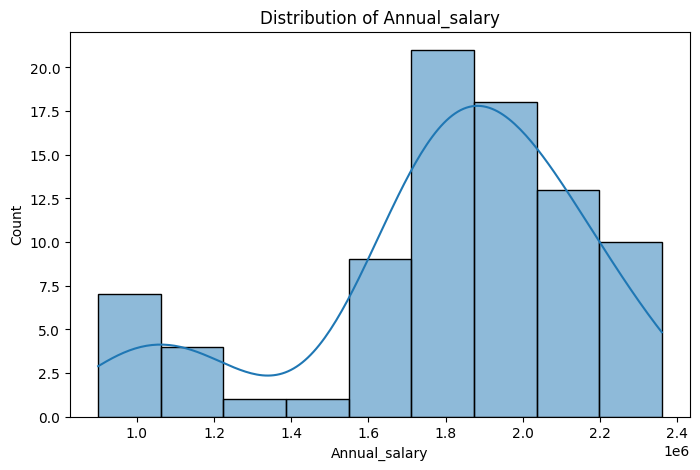

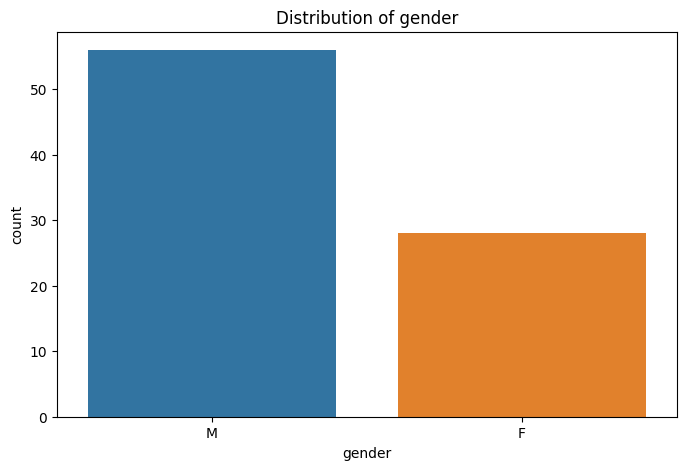

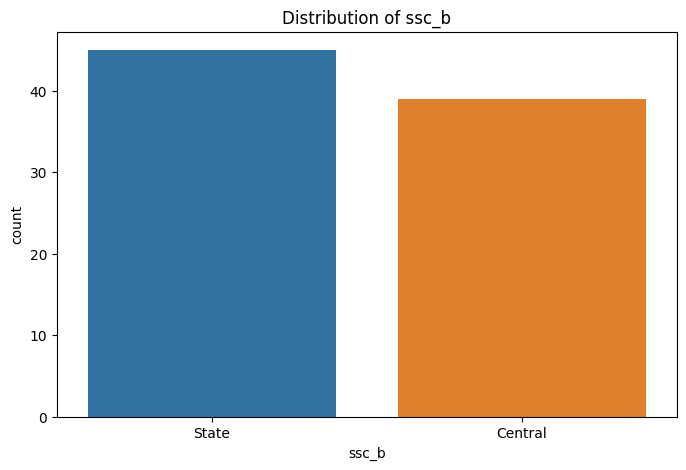

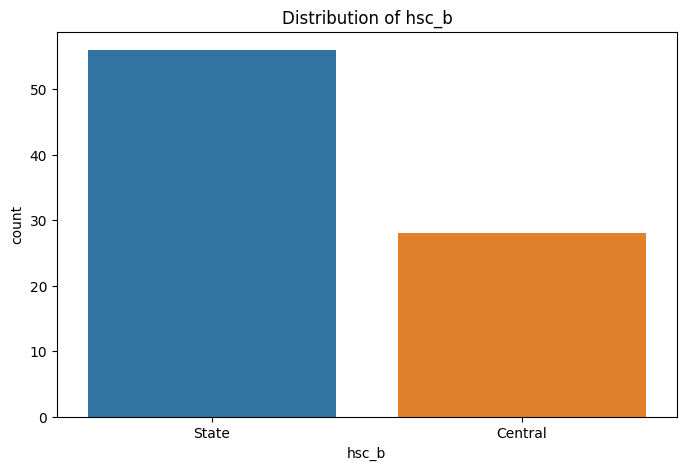

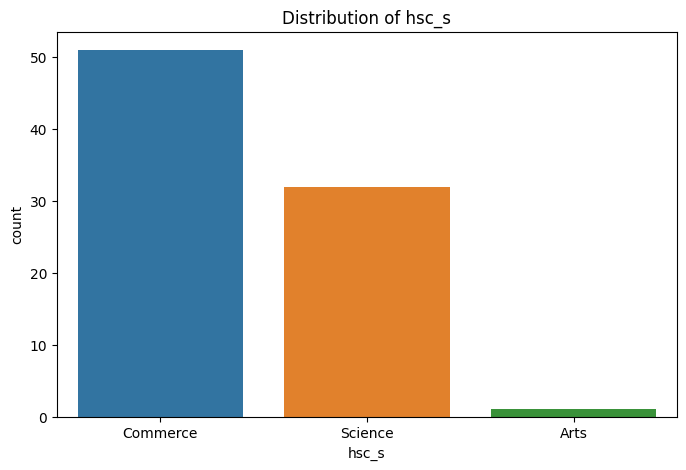

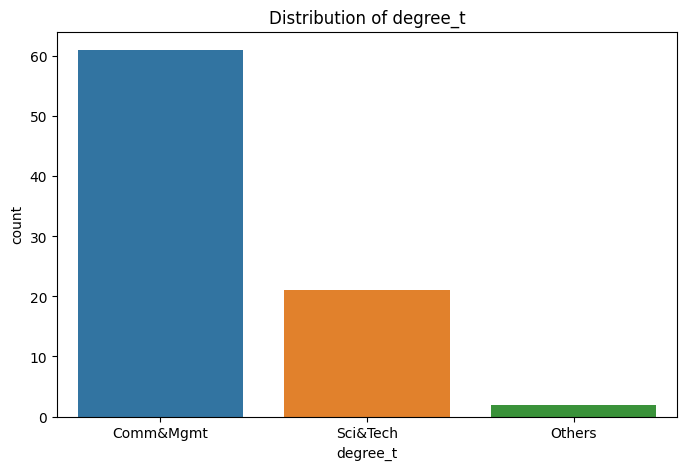

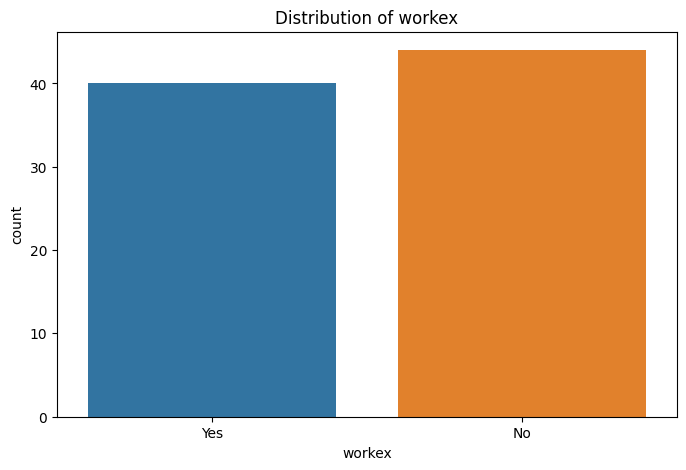

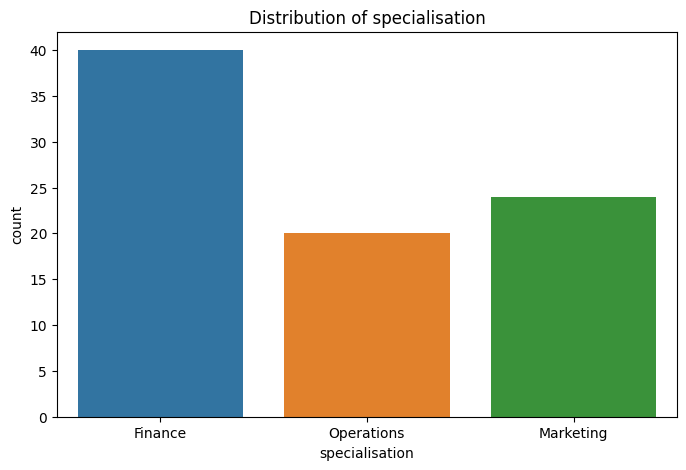

<ipython-input-4-f62a8eedf378>:30: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = train_df.corr()


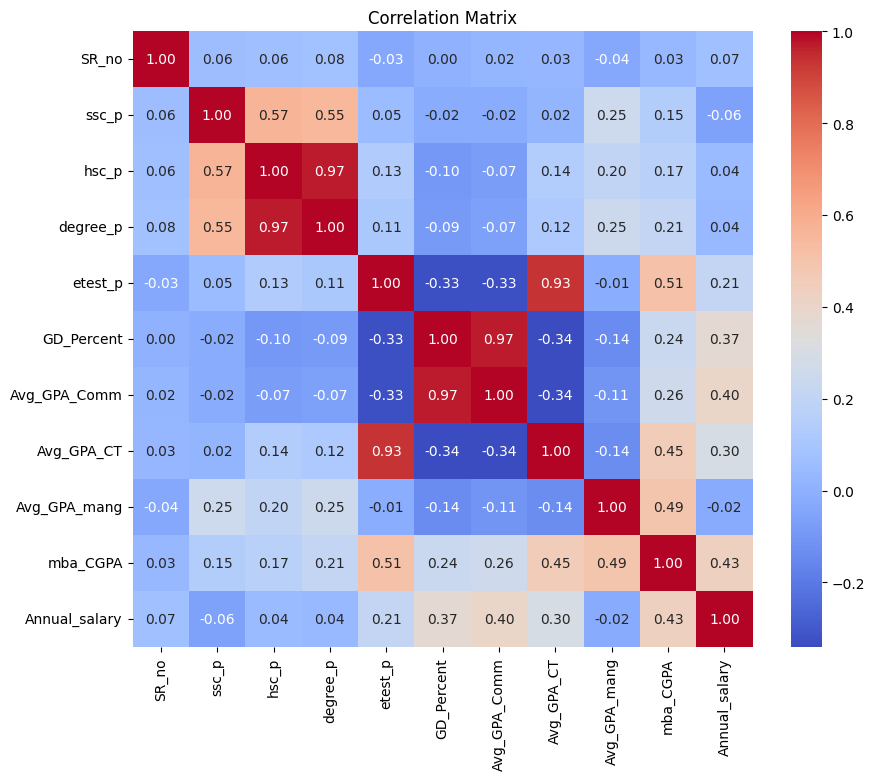

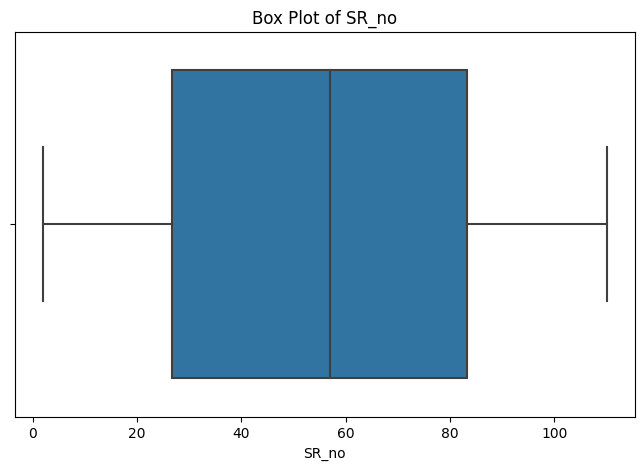

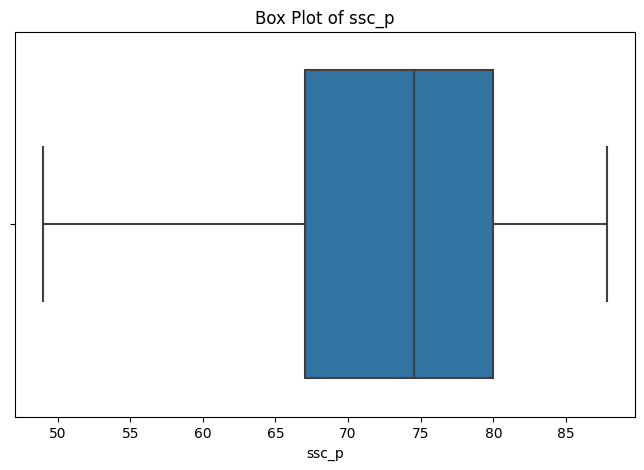

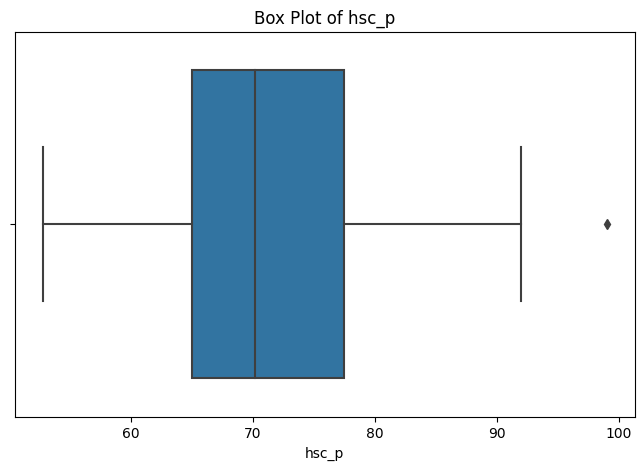

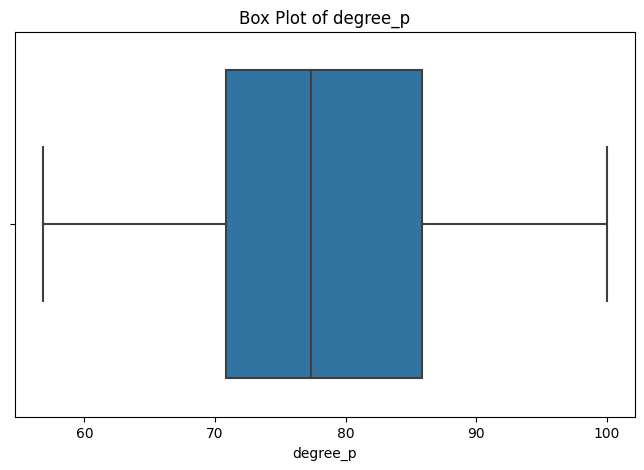

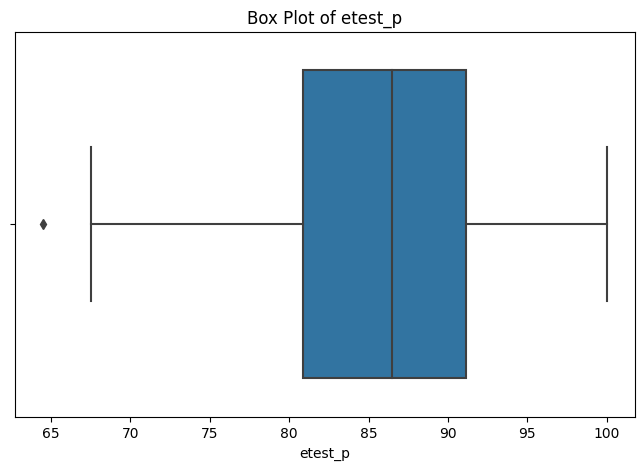

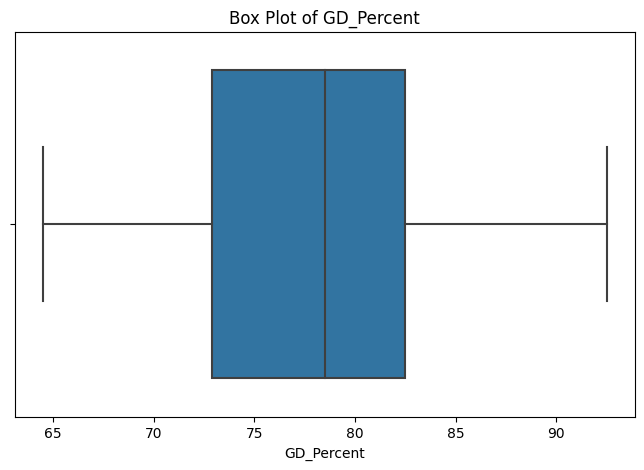

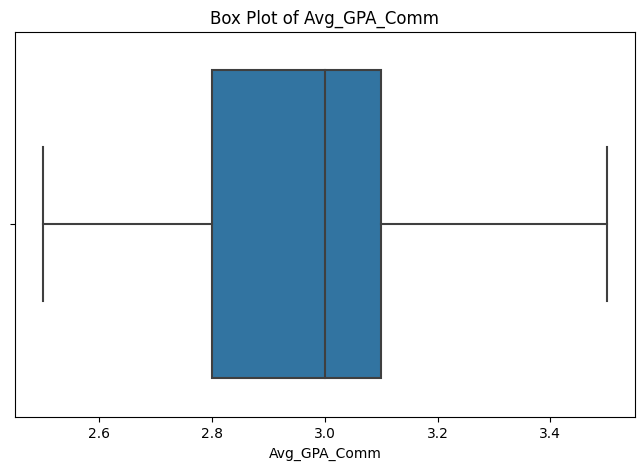

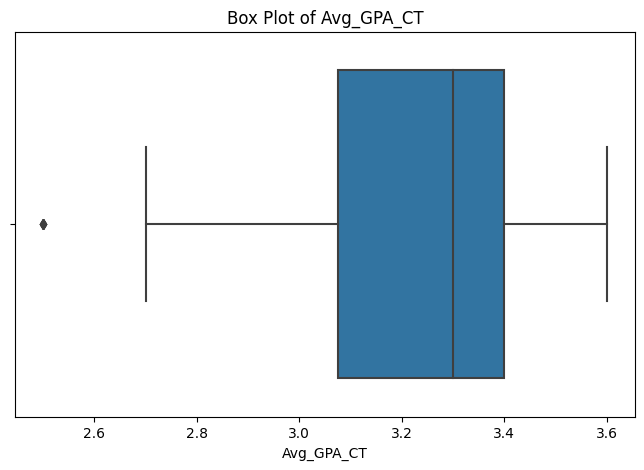

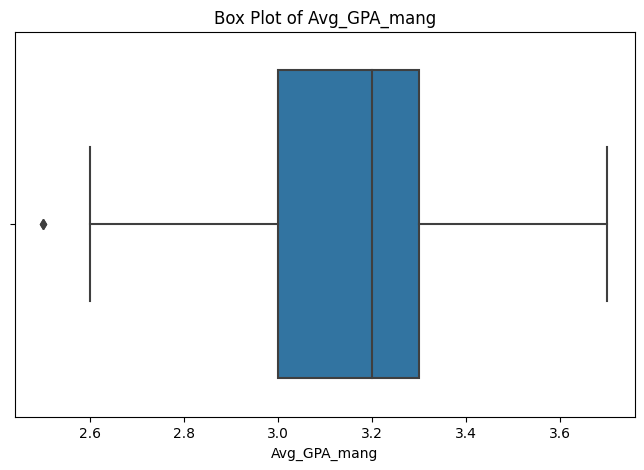

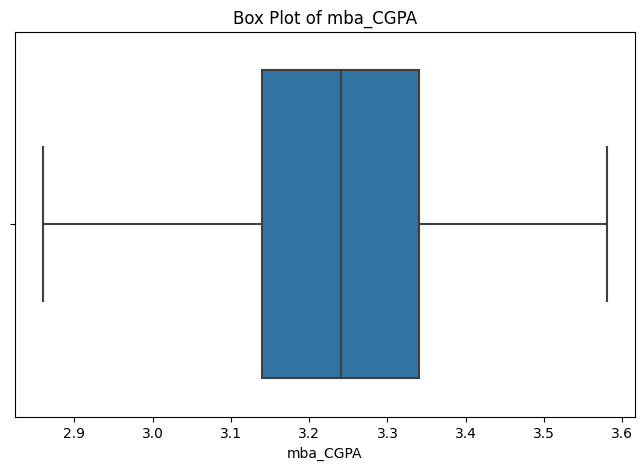

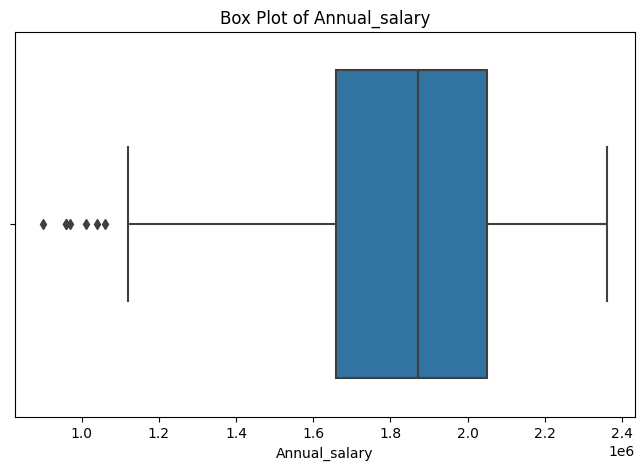

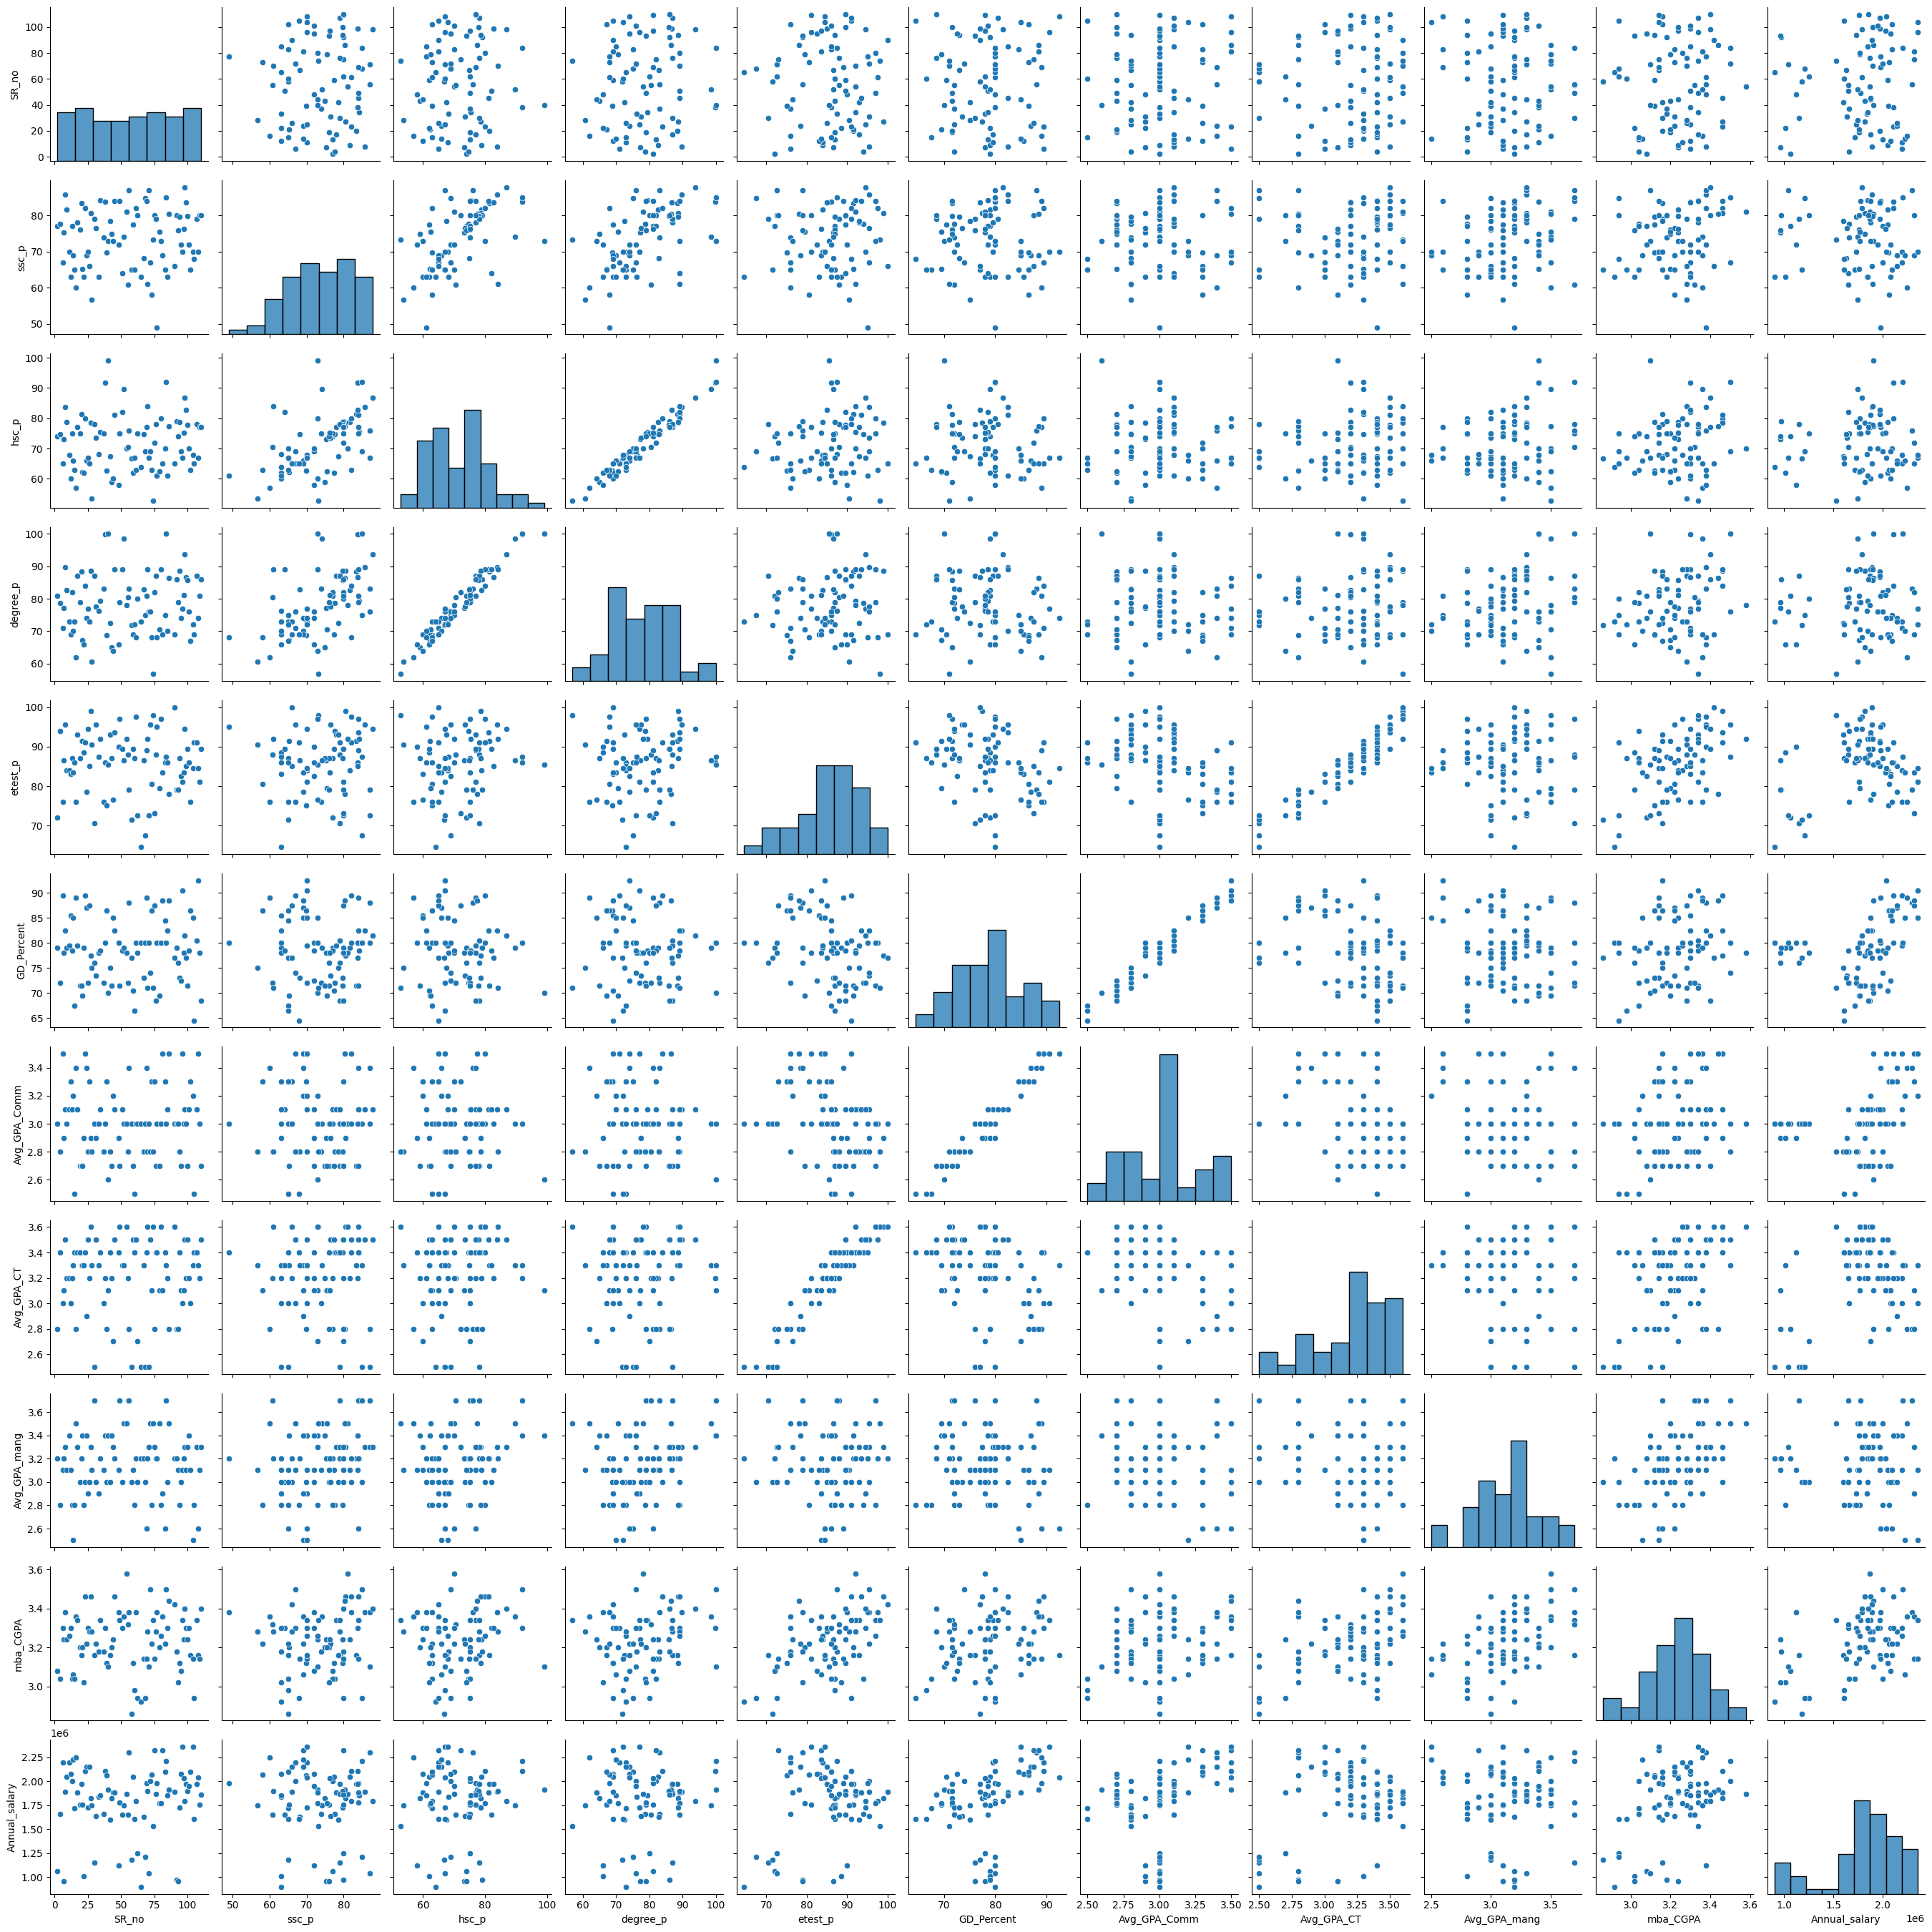

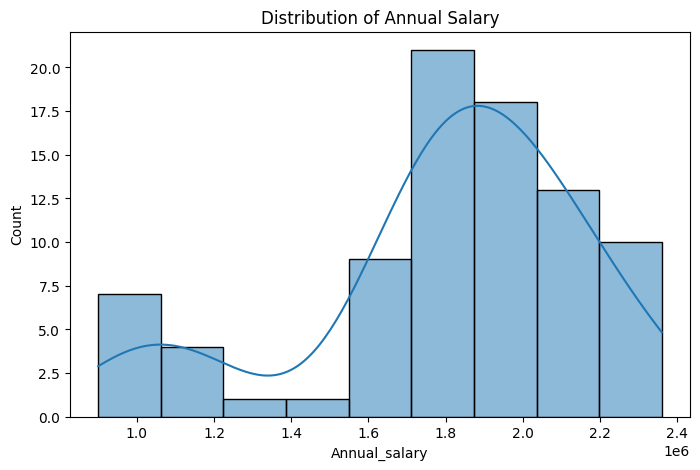

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'train_df' is your DataFrame
# If you haven't imported seaborn and matplotlib, you can do so with:
# import seaborn as sns
# import matplotlib.pyplot as plt

# Summary Statistics
print(train_df.describe())

# Distribution Plots for Numeric Columns
numeric_columns = train_df.select_dtypes(include=['float64', 'int64']).columns
for column in numeric_columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(train_df[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()

# Categorical Variables
categorical_columns = train_df.select_dtypes(include='object').columns
for column in categorical_columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=column, data=train_df)
    plt.title(f'Distribution of {column}')
    plt.show()

# Correlation Analysis
correlation_matrix = train_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Box Plots for Outliers
for column in numeric_columns:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=train_df[column])
    plt.title(f'Box Plot of {column}')
    plt.show()

# Pair Plots
sns.pairplot(train_df[numeric_columns])
plt.show()

# Distribution of Target Variable
plt.figure(figsize=(8, 5))
sns.histplot(train_df['Annual_salary'], kde=True)
plt.title('Distribution of Annual Salary')
plt.show()


In [ ]:
# Identify categorical and numerical columns
categorical_cols = [cname for cname in train_df.columns if train_df[cname].dtype == "object"]
numerical_cols = [cname for cname in train_df.columns if train_df[cname].dtype in ['int64', 'float64']]
numerical_cols.remove('Annual_salary')  # Removing the target variable

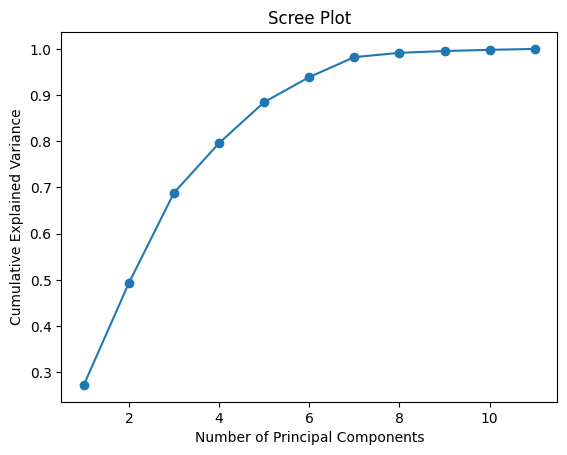

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with numerical columns
numeric_columns = train_df.select_dtypes(include=['float64', 'int64']).columns
data_for_pca = train_df[numeric_columns]

# Standardize the data
standardized_data = (data_for_pca - data_for_pca.mean()) / data_for_pca.std()

# Fit PCA
pca = PCA()
pca.fit(standardized_data)

# Plot the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = explained_variance_ratio.cumsum()

plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot')
plt.show()


Number of components to explain 95.0% of the variance: 7


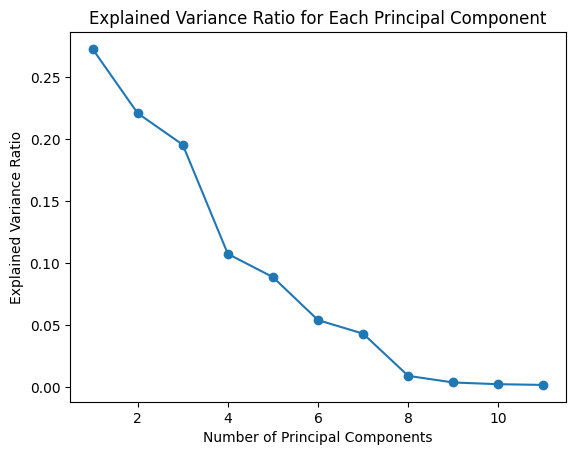

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with numerical columns
numeric_columns = train_df.select_dtypes(include=['float64', 'int64']).columns
data_for_pca = train_df[numeric_columns]

# Standardize the data
standardized_data = (data_for_pca - data_for_pca.mean()) / data_for_pca.std()

# Fit PCA
pca = PCA()
pca.fit(standardized_data)

# Determine the optimal number of components to explain, let's say, 95% of the variance
desired_variance = 0.95
num_components = (pca.explained_variance_ratio_.cumsum() < desired_variance).sum() + 1

# Print the result
print(f"Number of components to explain {desired_variance * 100}% of the variance: {num_components}")

# Alternatively, you can plot the explained variance ratio
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio for Each Principal Component')
plt.show()


In [ ]:
pip install factor-analyzer


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.5/42.5 kB 1.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.7/203.7 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.9/98.9 kB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 93.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.9/468.9 kB 40.6 MB/s eta 0:00:00
  Created wheel for factor-analyzer: filename=factor_analyzer-0.5.0-py2.py3-none-any.whl size=42487 sha256=c420d80c809b1cdf83d722472c08de4396cfe4e2ca7c3e22b4455bb5f53cdcc0
  Stored in directory: /root/.cache/pip/wheels/74/a2/6c/26fb1addf1ce6c60a8cef8397f2999f0a1e6e2fcddc8abf33e
Successfully built factor-analyzer


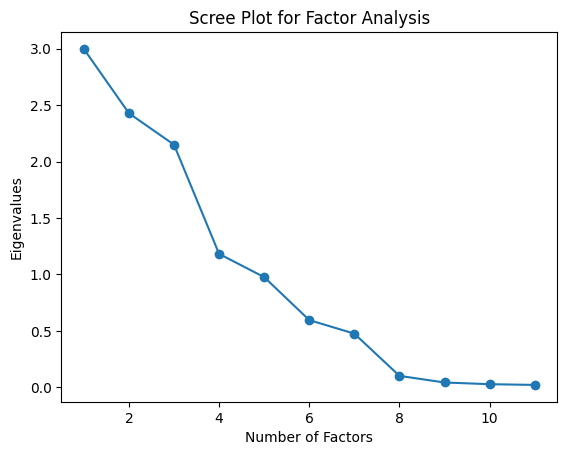

Number of factors according to the Kaiser criterion: 4


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from factor_analyzer import FactorAnalyzer

# Assuming df is your DataFrame with numerical columns
numeric_columns = train_df.select_dtypes(include=['float64', 'int64']).columns
data_for_factor_analysis = train_df[numeric_columns]

# Fit Factor Analysis
fa = FactorAnalyzer(rotation=None)  # You can choose a rotation method if needed
fa.fit(data_for_factor_analysis)

# Get eigenvalues and plot the scree plot
eigenvalues, _ = fa.get_eigenvalues()

plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, marker='o')
plt.xlabel('Number of Factors')
plt.ylabel('Eigenvalues')
plt.title('Scree Plot for Factor Analysis')
plt.show()

# Determine the optimal number of factors using the Kaiser criterion (eigenvalue > 1)
optimal_num_factors = (eigenvalues > 1).sum()

# Print the result
print(f"Number of factors according to the Kaiser criterion: {optimal_num_factors}")

# Alternatively, you can use other criteria for factor selection, such as the Cattell's scree test.


In [ ]:
from factor_analyzer import FactorAnalyzer

# Assuming train_df is your DataFrame with numerical columns
numeric_columns = train_df.select_dtypes(include=['float64', 'int64']).columns
data_for_factor_analysis = train_df[numeric_columns]

# Fit Factor Analysis
fa = FactorAnalyzer(rotation=None)  # You can choose a rotation method if needed
fa.fit(data_for_factor_analysis)

# Get factor loadings and factor names
factor_loadings = fa.loadings_
factor_names = [f"Factor {i+1}" for i in range(factor_loadings.shape[1])]

# Print factor names
print("Factor Names:", factor_names)

# Print factor loadings with variable names
for i, variable in enumerate(data_for_factor_analysis.columns):
    print(f"\nVariable: {variable}")
    for j, factor in enumerate(factor_names):
        print(f"{factor}: {factor_loadings[i, j]}")


Factor Names: ['Factor 1', 'Factor 2', 'Factor 3']

Variable: SR_no
Factor 1: 0.033884590012331635
Factor 2: 0.06681173043591881
Factor 3: -0.014878823089601836

Variable: ssc_p
Factor 1: 0.357113840505766
Factor 2: 0.35379546649439353
Factor 3: -0.321494272126096

Variable: hsc_p
Factor 1: 0.6323120926218149
Factor 2: 0.5315062847676795
Factor 3: -0.46688389436182803

Variable: degree_p
Factor 1: 0.6397472381250561
Factor 2: 0.5611136266230803
Factor 3: -0.4813635725311623

Variable: etest_p
Factor 1: 0.7372567205256774
Factor 2: -0.12975070439513764
Factor 3: 0.590648791673192

Variable: GD_Percent
Factor 1: -0.5680345910231167
Factor 2: 0.7184143195325019
Factor 3: 0.2874006236838095

Variable: Avg_GPA_Comm
Factor 1: -0.5671763266909537
Factor 2: 0.7662046224040908
Factor 3: 0.29810731119234624

Variable: Avg_GPA_CT
Factor 1: 0.7298871714892782
Factor 2: -0.14485708957225488
Factor 3: 0.6113768560510049

Variable: Avg_GPA_mang
Factor 1: 0.2139132955195123
Factor 2: 0.177272274367987

In [ ]:
from factor_analyzer import FactorAnalyzer

# Assuming train_df is your DataFrame with numerical columns
numeric_columns = train_df.select_dtypes(include=['float64', 'int64']).columns
data_for_factor_analysis = train_df[numeric_columns]

# Fit Factor Analysis
fa = FactorAnalyzer(rotation=None)  # You can choose a rotation method if needed
fa.fit(data_for_factor_analysis)

# Get factor loadings and factor names
factor_loadings = fa.loadings_
factor_names = [f"Factor {i+1}" for i in range(factor_loadings.shape[1])]

# Set a threshold for factor loadings
loading_threshold = 0.5

# Print only variables with factor loadings exceeding the threshold
for i, variable in enumerate(data_for_factor_analysis.columns):
    loadings_for_variable = factor_loadings[i, :]
    high_loadings = [(factor_names[j], loadings_for_variable[j]) for j in range(len(factor_names)) if abs(loadings_for_variable[j]) > loading_threshold]

    if high_loadings:
        print(f"\nVariable: {variable}")
        for factor, loading in high_loadings:
            print(f"{factor}: {loading}")



Variable: hsc_p
Factor 1: 0.6323120926218149
Factor 2: 0.5315062847676795

Variable: degree_p
Factor 1: 0.6397472381250561
Factor 2: 0.5611136266230803

Variable: etest_p
Factor 1: 0.7372567205256774
Factor 3: 0.590648791673192

Variable: GD_Percent
Factor 1: -0.5680345910231167
Factor 2: 0.7184143195325019

Variable: Avg_GPA_Comm
Factor 1: -0.5671763266909537
Factor 2: 0.7662046224040908

Variable: Avg_GPA_CT
Factor 1: 0.7298871714892782
Factor 3: 0.6113768560510049


In [ ]:
# Preprocessing for numerical and categorical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant')),
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

pca_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('pca', PCA(n_components=7))
])

factor_analysis_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('fa', FactorAnalysis(n_components=4))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols),
        ('pca_num', pca_transformer, numerical_cols),
        ('fa_num', factor_analysis_transformer, numerical_cols)
    ])


In [ ]:

# Separate target from predictors
X = train_df.drop(['Annual_salary'], axis=1)
y = train_df['Annual_salary']

# Split data into train and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)



In [ ]:
# Define models
rf_model = RandomForestRegressor(random_state=0)
svr_model = SVR()
knn_model = KNeighborsRegressor()
gb_model = GradientBoostingRegressor(random_state=0)
ridge_model = Ridge()
lasso_model = Lasso()


In [ ]:
# Create pipelines with the preprocessing steps and different models
rf_clf = Pipeline(steps=[('preprocessor', preprocessor), ('model', rf_model)])
svr_clf = Pipeline(steps=[('preprocessor', preprocessor), ('model', svr_model)])
knn_clf = Pipeline(steps=[('preprocessor', preprocessor), ('model', knn_model)])
gb_clf = Pipeline(steps=[('preprocessor', preprocessor), ('model', gb_model)])
ridge_clf = Pipeline(steps=[('preprocessor', preprocessor), ('model', ridge_model)])
lasso_clf = Pipeline(steps=[('preprocessor', preprocessor), ('model', lasso_model)])


In [ ]:
# Define hyperparameter grids for each model
rf_param_grid = {
    'model__n_estimators': [100, 200, 300],
    'model__max_depth': [None, 10, 20, 30],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4]
}

svr_param_grid = {
    'model__C': [0.1, 1.0, 10.0, 100.0],
    'model__kernel': ['linear', 'rbf', 'poly'],
    'model__degree': [2, 3]
}

knn_param_grid = {
    'model__n_neighbors': [3, 5, 7],
    'model__weights': ['uniform', 'distance']
}

gb_param_grid = {
    'model__n_estimators': [100, 200, 300],
    'model__learning_rate': [0.05, 0.1, 0.2, 0.3],
    'model__max_depth': [3, 4, 5, 6]
}

ridge_param_grid = {
    'model__alpha': [0.1, 1.0, 10.0]
}

lasso_param_grid = {
    'model__alpha': [0.1, 1.0, 10.0]
}


In [ ]:
# Perform hyperparameter tuning using GridSearchCV for each model
rf_grid_search = GridSearchCV(rf_clf, rf_param_grid, cv=3, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)
svr_grid_search = GridSearchCV(svr_clf, svr_param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)
knn_grid_search = GridSearchCV(knn_clf, knn_param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)
gb_grid_search = GridSearchCV(gb_clf, gb_param_grid, cv=3, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)
ridge_grid_search = GridSearchCV(ridge_clf, ridge_param_grid, cv=3, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)
lasso_grid_search = GridSearchCV(lasso_clf, lasso_param_grid, cv=3, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)


In [ ]:
rf_grid_search.fit(X_train, y_train)
svr_grid_search.fit(X_train, y_train)
knn_grid_search.fit(X_train, y_train)
gb_grid_search.fit(X_train, y_train)
ridge_grid_search.fit(X_train, y_train)
lasso_grid_search.fit(X_train, y_train)


Fitting 3 folds for each of 108 candidates, totalling 324 fits
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Fitting 3 folds for each of 48 candidates, totalling 144 fits
Fitting 3 folds for each of 3 candidates, totalling 9 fits
Fitting 3 folds for each of 3 candidates, totalling 9 fits


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.174e+11, tolerance: 9.280e+08
  model = cd_fast.enet_coordinate_descent(


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='constant')),
                                                                                         ('poly',
                                                                                          PolynomialFeatures(include_bias=False)),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['SR_no',
                                                                          'ssc_p',
                                                                          'hsc_p',
                                                                          'degree_p',
                                                                          'etest_p',
                                                                          'GD_Percent',
                                                                          'Avg_GPA_Comm',
                                                                          'Avg_GPA_CT',
                                                                          'Avg_GPA_mang',
                                                                          'mba_CGP...
                                                                          'Avg_GPA_mang',
                                                                          'mba_CGPA']),
                                                                        ('fa_num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('fa',
                                                                                          FactorAnalysis(n_components=4))]),
                                                                         ['SR_no',
                                                                          'ssc_p',
                                                                          'hsc_p',
                                                                          'degree_p',
                                                                          'etest_p',
                                                                          'GD_Percent',
                                                                          'Avg_GPA_Comm',
                                                                          'Avg_GPA_CT',
                                                                          'Avg_GPA_mang',
                                                                          'mba_CGPA'])])),
                                       ('model', Lasso())]),
             n_jobs=-1, param_grid={'model__alpha': [0.1, 1.0, 10.0]},
             scoring='neg_mean_squared_error', verbose=1)

In [ ]:
# Access the best models
best_rf_model = rf_grid_search.best_estimator_
best_svr_model = svr_grid_search.best_estimator_
best_knn_model = knn_grid_search.best_estimator_
best_gb_model = gb_grid_search.best_estimator_
best_ridge_model = ridge_grid_search.best_estimator_
best_lasso_model = lasso_grid_search.best_estimator_

In [ ]:
print("Best Parameters for Random Forest Regressor:")
print(best_rf_model.get_params())

print("\nBest Parameters for Support Vector Regressor:")
print(best_svr_model.get_params())

print("\nBest Parameters for K-Neighbors Regressor:")
print(best_knn_model.get_params())

print("\nBest Parameters for Gradient Boosting Regressor:")
print(best_gb_model.get_params())

print("\nBest Parameters for Ridge Regression:")
print(best_ridge_model.get_params())

print("\nBest Parameters for Lasso Regression:")
print(best_lasso_model.get_params())


Best Parameters for Random Forest Regressor:
{'memory': None, 'steps': [('preprocessor', ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='constant')),
                                                 ('poly',
                                                  PolynomialFeatures(include_bias=False)),
                                                 ('scaler', StandardScaler())]),
                                 ['SR_no', 'ssc_p', 'hsc_p', 'degree_p',
                                  'etest_p', 'GD_Percent', 'Avg_GPA_Comm',
                                  'Avg_GPA_CT', 'Avg_GPA_mang', 'mba_CGPA']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strateg...
                                                 ('pca', PCA(n_components=7))]),
          

In [ ]:
# Make predictions on the validation set
rf_preds = best_rf_model.predict(X_valid)
svr_preds = best_svr_model.predict(X_valid)
knn_preds = best_knn_model.predict(X_valid)
gb_preds = best_gb_model.predict(X_valid)
ridge_preds = best_ridge_model.predict(X_valid)
lasso_preds = best_lasso_model.predict(X_valid)


In [ ]:
# Calculate RMSE for each model on the validation set
rf_rmse = mean_squared_error(y_valid, rf_preds, squared=False)
svr_rmse = mean_squared_error(y_valid, svr_preds, squared=False)
knn_rmse = mean_squared_error(y_valid, knn_preds, squared=False)
gb_rmse = mean_squared_error(y_valid, gb_preds, squared=False)
ridge_rmse = mean_squared_error(y_valid, ridge_preds, squared=False)
lasso_rmse = mean_squared_error(y_valid, lasso_preds, squared=False)

In [ ]:
# Display the RMSE for each model
print("RMSE with Random Forest on Validation Set:", rf_rmse)
print("RMSE with Support Vector Regressor on Validation Set:", svr_rmse)
print("RMSE with K-Nearest Neighbors on Validation Set:", knn_rmse)
print("RMSE with Gradient Boosting on Validation Set:", gb_rmse)
print("RMSE with Ridge Regression on Validation Set:", ridge_rmse)
print("RMSE with Lasso Regression on Validation Set:", lasso_rmse)



RMSE with Random Forest on Validation Set: 208495.80930887148
RMSE with Support Vector Regressor on Validation Set: 261159.802425875
RMSE with K-Nearest Neighbors on Validation Set: 340673.72672351555
RMSE with Gradient Boosting on Validation Set: 180808.9750433445
RMSE with Ridge Regression on Validation Set: 297207.85996849905
RMSE with Lasso Regression on Validation Set: 333804.3868457042


In [ ]:


# Select the model with the lowest RMSE on the validation set
best_model_name = min({'Random Forest': rf_rmse, 'SVR': svr_rmse, 'KNN': knn_rmse, 'Gradient Boosting': gb_rmse, 'Ridge Regression': ridge_rmse, 'Lasso Regression': lasso_rmse},
                      key=lambda k: {'Random Forest': rf_rmse, 'SVR': svr_rmse, 'KNN': knn_rmse, 'Gradient Boosting': gb_rmse, 'Ridge Regression': ridge_rmse, 'Lasso Regression': lasso_rmse}[k])
best_model = {'Random Forest': best_rf_model, 'SVR': best_svr_model, 'KNN': best_knn_model, 'Gradient Boosting': best_gb_model, 'Ridge Regression': best_ridge_model, 'Lasso Regression': best_lasso_model}[best_model_name]

# Display the selected model and its RMSE
print(f"Selected Model: {best_model_name}")
print("RMSE on Validation Set:", {'Random Forest': rf_rmse, 'SVR': svr_rmse, 'KNN': knn_rmse, 'Gradient Boosting': gb_rmse, 'Ridge Regression': ridge_rmse, 'Lasso Regression': lasso_rmse}[best_model_name])

# Predict on test data with the best model
best_test_preds = best_model.predict(test_df)

# Save the output to a CSV file
best_output = pd.DataFrame({'SR_no': test_df.SR_no, 'Annual_salary': best_test_preds})
best_output.to_csv('predicted_salaries_best_model.csv', index=False)


Selected Model: Gradient Boosting
RMSE on Validation Set: 180808.9750433445


In [ ]:
# Define a list of models and their corresponding names
all_models = {
    'Random Forest': best_rf_model,
    'SVR': best_svr_model,
    'KNN': best_knn_model,
    'Gradient Boosting': best_gb_model,
    'Ridge Regression': best_ridge_model,
    'Lasso Regression': best_lasso_model
}

# Loop through all models and make predictions on the test data
for model_name, model in all_models.items():
    test_preds = model.predict(test_df)
    output_df = pd.DataFrame({'SR_no': test_df.SR_no, 'Annual_salary': test_preds})
    output_df.to_csv(f'predicted_salaries_{model_name.replace(" ", "_").lower()}.csv', index=False)


In [ ]:

from sklearn.ensemble import StackingRegressor
stacking_reg = StackingRegressor(
    estimators=[
        ('rf', best_rf_model),
        ('svr', best_svr_model),
        ('knn', best_knn_model),
        ('gb', best_gb_model),
        ('ridge', best_ridge_model),
        ('lasso', best_lasso_model)
    ],
    final_estimator=RandomForestRegressor(random_state=0),  # You can choose a different final estimator
    cv=5
)

# Fit the stacking regressor on the training data
stacking_reg.fit(X_train, y_train)

# Make predictions on the validation set
stacking_preds = stacking_reg.predict(X_valid)

# Calculate RMSE for stacking on the validation set
stacking_rmse = mean_squared_error(y_valid, stacking_preds, squared=False)
print("RMSE with Stacking on Validation Set:", stacking_rmse)

# Make predictions on the test data with stacking
stacking_test_preds = stacking_reg.predict(test_df)

# Save the output to a CSV file
stacking_output = pd.DataFrame({'SR_no': test_df.SR_no, 'Annual_salary': stacking_test_preds})
stacking_output.to_csv('predicted_salaries_stacking.csv', index=False)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.174e+11, tolerance: 9.280e+08
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.234e+11, tolerance: 6.824e+08
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.107e+11, tolerance: 7.401e

RMSE with Stacking on Validation Set: 234793.67538330329
